In [493]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; } </style>"))
import numpy as np
import scipy as sc
import scipy.special as spc
np.set_printoptions(linewidth=160)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


$\rho \nabla^2 \hat u = \hat f$

$\hat u = 0$ on $\partial S$

$ \boldsymbol{A} u = f $

$ \boldsymbol{B} u = 0 $

$a \nabla u \cdot  d\boldsymbol{s} + b u = g$ on $\partial S$

In [2]:
nx=5
ny=5
x=np.linspace(0,1,nx)
y=np.linspace(0,1,ny)
vx,vy=np.meshgrid(x,y)

In [354]:
An0=np.zeros((nx*ny,nx*ny))
for i in range(0,nx):
    for j in range(0,ny):
        if i>0:
            An0[j*nx+i,j*nx+i]-=1
            An0[j*nx+i,j*nx+(i-1)]=1
        if i<(nx-1):
            An0[j*nx+i,j*nx+i]-=1
            An0[j*nx+i,j*nx+(i+1)]=1
        if j>0:
            An0[j*nx+i,j*nx+i]-=1
            An0[j*nx+i,(j-1)*nx+i]=1
        if j<(ny-1):
            An0[j*nx+i,j*nx+i]-=1
            An0[j*nx+i,(j+1)*nx+i]=1
An0

array([[-2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -3.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -3.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -3.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0., -3.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,

In [353]:
Ad0=np.zeros((nx*ny,nx*ny))
for i in range(0,nx):
    for j in range(0,ny):
        Ad0[j*nx+i,j*nx+i]=-4
        if i>0:
            Ad0[j*nx+i,j*nx+(i-1)]=1
        if i<(nx-1):
            Ad0[j*nx+i,j*nx+(i+1)]=1
        if j>0:
            Ad0[j*nx+i,(j-1)*nx+i]=1
        if j<(ny-1):
            Ad0[j*nx+i,(j+1)*nx+i]=1
Ad0

array([[-4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -4.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  1., -4.,  1.,  0.,  0.,

In [228]:
dx=np.zeros((nx*ny,nx*ny))
dy=np.zeros((nx*ny,nx*ny))
for i in range(1,nx):
    for j in range(ny):
        if (i>0) and (i<(nx-1)):
            dx[j*nx+i,j*nx+i-1]=-.5
            dx[j*nx+i,j*nx+i+1]=.5
#            dx[j*nx+i,j*nx+i-1]=-1
#            dx[j*nx+i,j*nx+i]=1
        elif (i==0):
            dx[j*nx+i,j*nx+i]=-1.
            dx[j*nx+i,j*nx+i+1]=1.
        else:
            dx[j*nx+i,j*nx+i-1]=-1.
            dx[j*nx+i,j*nx+i]=1.
        if (j>0) and (j<(ny-1)):
            dy[j*nx+i,(j-1)*nx+i]=-.5
            dy[j*nx+i,(j+1)*nx+i]=.5
#            dy[j*nx+i,(j-1)*nx+i]=-1
#            dy[j*nx+i,(j)*nx+i]=1
        elif (j==0):
            dy[j*nx+i,(j)*nx+i]=-1.
            dy[j*nx+i,(j+1)*nx+i]=1.
        else:
            dy[j*nx+i,(j-1)*nx+i]=-1.
            dy[j*nx+i,(j)*nx+i]=1.
            

In [4]:
bnd=(vy==0)# | (vx==0)
bndx=(vy==0)
bndy=np.array([])#bnd & (vy!=0)
freenode=np.argwhere((bnd!=True).flatten()).flatten()
bndxnode=np.argwhere((bndx.flatten())).flatten()
bndynode=np.argwhere((bndy.flatten())).flatten()

In [229]:
A=dx*nx+dy*ny

In [233]:
dx

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -0.5,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -1. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0

In [6]:
u=np.zeros((nx*ny,1))
bx=vx.reshape((nx*ny,1))[bndxnode]
by=vy.reshape((nx*ny,1))[bndynode]
u[bndxnode]=1/2*bx*bx
#u[bndynode]=1/2*by*by
bndnode=np.argwhere((bnd==True).flatten()).flatten()#np.hstack((bndxnode,bndynode))
f=vx.reshape(nx*ny,1)
#sol=np.vstack((u[bndnode],np.linalg.solve(A[freenode][:,freenode],f[freenode]-np.matmul(A,u)[freenode])))

#sol=np.linalg.solve(A[freenode][:,freenode],f[freenode]-np.matmul(A[freenode][:,bndnode],u[bndnode]))
sol=np.linalg.lstsq(A[:,freenode],f-np.matmul(A[:,bndnode],u[bndnode]))
u[freenode]=sol[0]
vs=u.reshape(ny,nx)
B=A.copy()
B[bndnode]=0
#solerr=sol-((vx*vx-vx*vy+vy*vy/2).flatten()[freenode].reshape((nx-1)*(ny-1),1))
B[bndnode,bndnode]=1
f2=f.copy()
f2[bndnode]=u[bndnode]
u2=np.linalg.solve(B,f2)
vs2=u2.reshape(ny,nx)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


LinAlgError: Singular matrix

Text(0.5, 0, 'z')

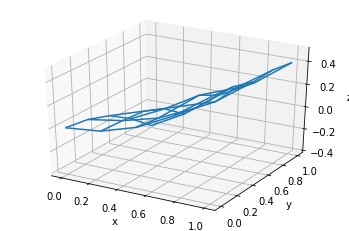

In [7]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(vx, vy, vs,rstride=1,cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.5, 0, 'z')

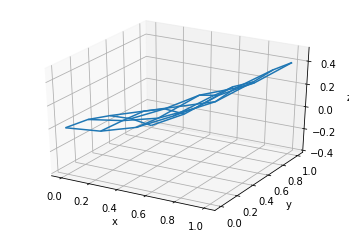

In [310]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(vx, vy, vs2,rstride=1,cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [288]:
er=np.matmul(A,u)-vx.reshape(nx*ny,1)
ve=er.reshape(ny,nx)

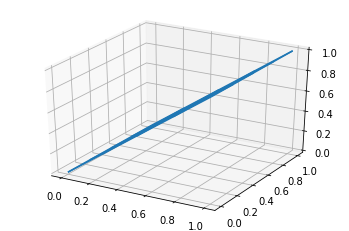

In [289]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(vx, vy, np.matmul(A,u).reshape(nx,ny),rstride=1,cstride=1)

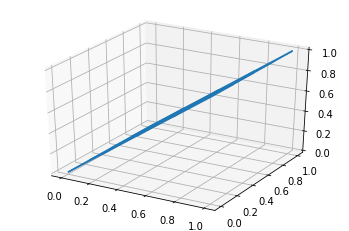

In [290]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(vx, vy, f.reshape(nx,ny),rstride=1,cstride=1)

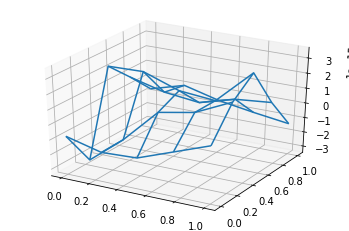

In [291]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(vx, vy, ve,rstride=1,cstride=1)

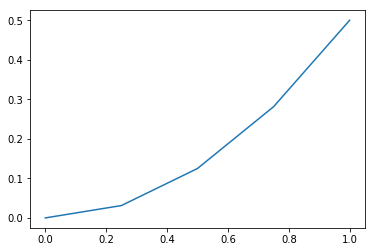

In [292]:
%matplotlib inline
plt.plot(vx.reshape(nx*ny,1)[bndnode],u[bndnode])

In [ ]:
Abx=np.eye(nx,nx*ny)
Aby=np.zeros((ny-1,nx*ny))
Aby[range(ny-1),bndynode]=1
Ab=np.vstack((Abx,Aby,A))

fb=np.vstack((u[bndxnode],u[bndynode],f))
sol2=np.linalg.lstsq(Ab,fb)
vs2=sol2[0].reshape(ny,nx)

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(vx, vy, vs2,rstride=1,cstride=1)

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(vx, vy, vs2-(vx*vx-vx*vy+vy*vy/2),rstride=1,cstride=1)

In [ ]:
er2=np.matmul(A,sol2[0])-vx.reshape(nx*ny,1)
ve2=er2.reshape(ny,nx)

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(vx, vy, ve2)

In [140]:
A

array([[-10.,   5.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -5.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  -5.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,  -5.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  -5.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -5.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  -5.,   0.,   0.,   0.,  -5.,  1

In [207]:
(A[freenode][:,freenode])

array([[ 0. ,  2.5,  0. ,  0. ,  2.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-2.5,  0. ,  2.5,  0. ,  0. ,  2.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -2.5,  0. ,  2.5,  0. ,  0. ,  2.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -5. ,  5. ,  0. ,  0. ,  0. ,  2.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-2.5,  0. ,  0. ,  0. ,  0. ,  2.5,  0. ,  0. ,  2.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -2.5,  0. ,  0. , -2.5,  0. ,  2.5,  0. ,  0. ,  2.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -2.5,  0. ,  0. , -2.5,  0. ,  2.5,  0. ,  0. ,  2.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -2.5,  0. ,  0. , -5. ,  5. ,  0. ,  0. ,  0. ,  2.5,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -2.5,  0. ,  0. ,  0. ,  0. ,  2.5,  0. ,  0. ,  2.5,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -2.5,  0. ,  0. ,

In [211]:
f[freenode],A[freenode][:,bndnode],u[bndnode]

(array([[0.25],
        [0.5 ],
        [0.75],
        [1.  ],
        [0.25],
        [0.5 ],
        [0.75],
        [1.  ],
        [0.25],
        [0.5 ],
        [0.75],
        [1.  ],
        [0.25],
        [0.5 ],
        [0.75],
        [1.  ]]),
 array([[ 0. , -2.5,  0. ,  0. ,  0. , -2.5,  0. ,  0. ,  0. ],
        [ 0. ,  0. , -2.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. , -2.5,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. , -2.5,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -2.5,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -2.5,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,

In [104]:
dy

array([[-1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,

$ u_{i-2} = u_i - 2 \Delta x \frac{\partial u}{\partial x} + 4 \frac{\Delta x^2}{2} \frac{\partial^2 u}{\partial x^2} - 8 \frac{\Delta x^3}{3!} \frac{\partial^3 u}{\partial x^3} + 16 \frac{\Delta x^4}{4!} \frac{\partial^4 u}{\partial x^4} + O\left(\Delta x^5\right) $

$ u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x} + \frac{\Delta x^2}{2} \frac{\partial^2 u}{\partial x^2} - \frac{\Delta x^3}{3!} \frac{\partial^3 u}{\partial x^3} + \frac{\Delta x^4}{4!} \frac{\partial^4 u}{\partial x^4} + O\left(\Delta x^5\right) $

$ u_i = u_i $

$ u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x} + \frac{\Delta x^2}{2} \frac{\partial^2 u}{\partial x^2} + \frac{\Delta x^3}{3!} \frac{\partial^3 u}{\partial x^3} + \frac{\Delta x^4}{4!} \frac{\partial^4 u}{\partial x^4} + O\left(\Delta x^5\right) $

$ u_{i+2} = u_i + 2 \Delta x \frac{\partial u}{\partial x} + 4 \frac{\Delta x^2}{2} \frac{\partial^2 u}{\partial x^2} + 8 \frac{\Delta x^3}{3!} \frac{\partial^3 u}{\partial x^3} + 16 \frac{\Delta x^4}{4!} \frac{\partial^4 u}{\partial x^4} + O\left(\Delta x^5\right) $

$ a u_{i-2} + b u_{i-1} + c u_i + d u_{i+1} + e u_{i+2} =
   \left( a+b+c+d+e \right) u_i 
+  \left( -2 a -b+c+d+2 e \right) \Delta x \frac{\partial u}{\partial x} 
+  \frac{ 4 a + b + c+ d + 4 e }{2} \Delta x^2 \frac{\partial^2 u}{\partial x^2} 
+  \frac{ -8 a - b + c + d + 8 e }{3!} \Delta x^3 \frac{\partial^3 u}{\partial x^3} 
+  \frac{ 16 a + b + c + d + 16 e }{4!} \Delta x^4 \frac{\partial^4 u}{\partial x^4} 
$

$ a+b+c+d+e = 0 $

$ -2 a -b+d+2 e = 0$

$ 4 a + b +  d + 4 e = 1$

$ -8 a - b + d + 8 e = 0$

$ 16 a + b + d + 16 e = 0$

In [355]:
S=np.array([[1,1,1,1,1],[-2,-1,0,1,2],[4/2,1/2,0,1/2,4/2],[-8/6,-1/6,0,1/6,8/6],[16/24,1/24,0,1/24,16/24]])
np.linalg.solve(S,[0,1,0,0,0])

array([ 0.08333333, -0.66666667,  0.        ,  0.66666667, -0.08333333])

In [376]:
S1=np.matmul(np.matmul(np.diag([1,1,1,0,0]),S),np.diag([1,1,1,0,0]))#[:,1:-1]
abc,_,_,_=np.linalg.lstsq(S1,[0,0,1,0,0])
abc

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([ 1., -2.,  1.,  0.,  0.])

In [368]:
S1

array([[0. , 0. , 1. , 1. , 1. ],
       [0. , 0. , 0. , 1. , 2. ],
       [0. , 0. , 0. , 0.5, 2. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ]])

In [453]:
np.matmul(S,abc)

array([ 4.4408921e-16,  1.0000000e+00,  4.4408921e-16, -2.0000000e+00,  6.0000000e+00])

In [370]:
np.matmul(S,[0,0,-1,1,0])

array([0.        , 1.        , 0.5       , 0.16666667, 0.04166667])

In [703]:
def fdapprox(dd,diff_order,accuracy_order,distance=0,dim=1): # 0 = infinity
    if distance==0:
        mini=-accuracy_order // 2
        maxi=accuracy_order // 2
    elif distance<0:
        mini=(distance)+1
        maxi=mini+accuracy_order
    else:
        maxi=(distance)-1
        mini=maxi-accuracy_order
    x=dd*np.arange(mini,maxi+1).reshape(1,-1)
    print(x)
    f=1/spc.factorial(np.arange(accuracy_order+1)).reshape(-1,1)
    xp=f*(x**np.arange(accuracy_order+1).reshape(-1,1))
    t=np.zeros((accuracy_order+1,1))
    t[diff_order,0]=1
    ff=np.linalg.solve(xp,t)
    return(ff)
    
    
        
    

In [408]:
S=np.linspace(-2,2,5).reshape((1,-1))**(np.arange(5).reshape(-1,1))

In [452]:
S1=np.matmul(np.matmul(np.diag([1,1,1,0,0]),S),np.diag([1,1,1,0,0]))#[:,1:-1]
abc,_,_,_=np.linalg.lstsq(S1,[0,1,0,0,0])
abc

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([ 0.5, -2. ,  1.5,  0. ,  0. ])

In [434]:
S1

array([[ 10.,  10.,  10.,   0.,   0.],
       [-20., -10.,   0.,   0.,   0.],
       [ 40.,  10.,   0.,   0.,   0.],
       [ -8.,  -1.,   0.,   0.,   0.],
       [ 16.,   1.,   0.,   0.,   0.]])

In [488]:
np.arange(-4 // 2,4 // 2+1).reshape(-1,1)**np.arange(3).reshape(1,-1)

array([[ 1, -2,  4],
       [ 1, -1,  1],
       [ 1,  0,  0],
       [ 1,  1,  1],
       [ 1,  2,  4]])

In [481]:
np.arange(2-1-2,2-1+1)

array([-1,  0,  1])

In [690]:
ff=fdapprox(dd=1,diff_order=1,accuracy_order=2,distance=1,dim=1)
ff

array([[ 0.5],
       [-2. ],
       [ 1.5]])

In [757]:
ff=fdapprox(dd=1,diff_order=2,accuracy_order=2,distance=2,dim=1)
print(ff)
x0=np.linspace(-10,10,21)
x=1/6*x0**3
dt=[]
for n in range(19):
    dt.append(np.round(1000*np.sum(x[n:3+n]*ff.T))/1000)
dt=np.array(dt)
print(dt,x0)

[[-1  0  1]]
[[ 1.]
 [-2.]
 [ 1.]]
[-9. -8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.] [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


In [658]:
x

array([-1000.,  -729.,  -512.,  -343.,  -216.,  -125.,   -64.,   -27.,    -8.,    -1.,     0.,     1.,     8.,    27.,    64.,   125.,   216.,   343.,   512.,
         729.,  1000.])

In [669]:
6*26

156

In [694]:
int(0.001)

0